# Проект по математической статистике

**Цели проекта:**
1. Исследовать данные из файла: EurovisionDZ.xlsx
2. Определить распределения переменных
3. Выяснить корреляционные отношения между переменными
4. Проверить ряд гипотез и сделать выводы
5. Обосновать использование тестов для проверки гипотез о переменных:

## Подготовка к проведению исследования

### Импортируем необходимый набор библиотек

In [1]:
#библитеки необходимые для загрузки данных с гугл диска:
from io import BytesIO #Эта библиотека необходима вместе с 'requests' для доступа к файлу с данными из гугл диска
import requests

#библиотеки для работы с данными:
import pandas as pd
import numpy as np
import warnings #чтобы не всплывали ненужные предупреждения

#библиотеки для статистического анализа данных:
from scipy import stats as st 

from scipy.stats import kstest # тест Колмогорова-Смирнова
from scipy.stats import chisquare # критерий Пирсона (Хи-квадрат)

from scipy.stats import expon # Экспоненциальное распределение
from scipy.stats import uniform # Равномерное распределение

from scipy.stats import t # Критическая точка распределения Стьюдента
from scipy.stats import chi2 # Критическая точка распределения Хи-квадрат

#библиотеки для визуализации данных:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#библиотеки необходимые для рассчетов:
import math
from statistics import mode
from statistics import median
from statistics import variance

#библиотеки для красивого отображения 
from IPython.display import display, Math, Latex
from IPython.display import Image

In [2]:
pd.options.display.float_format = '{: .2f}'.format #отобразим данные с двумя числами после запятой
warnings.filterwarnings('ignore') #выключим ненужные предупреждения

In [ ]:
np.random.seed(0) #зададим сид, чтобы генерируемые данные можно было бы воспроизвести

### Откроем файл с данными

In [ ]:
#создадим датафрейм 
try:
    spreadsheet_id = '15szJs7ma7ZpY1RHPw3eYKwa1witie4qsCbR91mntHGo'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    data = pd.read_csv(BytesIO(r.content))    

except:
    data = pd.read_excel('EurovisionDZ.xlsx')

data.head(5)

In [ ]:
data.info()

### Приведем названия колонок в датасете к нижнему регистру для последующего удобства пользования ими

In [ ]:
data.columns = map(str.lower, data.columns)
data.head(5)

### Проверим на наличие пропусков в данных

In [ ]:
data.isna().sum()

### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">
Данные были загружены в Jupyter Notebook и готовы к последующей работе. Дубликаты не были обнаружены

</div>

<p></p>

## Исследование

### Ограничьте выборку, оставив только данные за 2018 год

In [ ]:
data

In [ ]:
data = data[data['year'] == 2018]
data = data.reset_index(drop=True)
data.head(5)

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">
Были оставлены данные только за 2018 год и была изменена индексация датафрейма. Приступим к основной части исследования

</div>

<p></p>

### Постройте описательные статистики переменных age, points, number, male (используйте те выборочные характеристики, которые мы изучали, не забудьте о моде, медиане, эксцессе, асимметрии, гистограмме, ЭФР). Дайте развернутый комментарий о предполагаемый рас-пределениях этих показателей

#### age

##### age с выбросами

In [ ]:
data.age.describe()

- mean - выборочное среднее

- 50% - выборочная медиана

- std - выборочное несмещенное стандартное отклонение

In [ ]:
mode(data.age) #выборочная мода

In [ ]:
avg = sum(data.age) / len(data.age)
sigma_squared = sum((x-avg)**2 for x in data.age) / len(data.age) 
sigma_squared #выборочная смещенная дисперсия

In [ ]:
math.sqrt(sigma_squared) #выборочное смещенное стандартное отклонение

In [ ]:
s_squared = sum((x-avg)**2 for x in data.age) / (len(data.age) - 1)
s_squared #выборочная несмещенная дисперсия

In [ ]:
st.kurtosis(data.age) #выборочный коэффициент эксцесса

In [ ]:
st.skew(data.age) #выборочный коэффициент ассиметрии

In [ ]:
math.sqrt(s_squared)/data.age.mean() #выборочный коэффициент вариации

In [ ]:
#гистограмма

data.age.hist() 
plt.show()

##### Дополнительная обработка

По гистограмме и по описанию данных можно заподозрить переменную в наличие выбросов, проверим данное предположение

In [ ]:
#Построим boxplot, чтобы посмотреть, как выглядят квартили, медиана, среднее и есть ли выбросы
plt.figure(figsize=(8,10))
plt.boxplot(data.age, showmeans=True,
                 capprops=dict(linestyle='--', linewidth=3, color='darkgoldenrod', label='границы'),
                 boxprops=dict(linestyle='--', linewidth=4, color='black', label='квартили'),
                 flierprops = dict(marker='*', markersize=10, markerfacecolor='lightblue', markeredgecolor='lightblue', label='выбросы'),
                 meanprops = dict(linestyle='-.', linewidth=2.5, color='yellow', label='среднее'),
                 medianprops = dict(linestyle='-.', linewidth=3.5, color='firebrick', label='медиана'),
                 whiskerprops=dict(linestyle='-', linewidth=2, color='green', label='Усы')) 
plt.legend()
plt.show()
#видны выбросы

In [ ]:
# построим ЭФР, чтобы удостоверится в том, что присутствуют точки выбивающиеся из основной части данных
df = px.data.tips()
fig = px.ecdf(df, x=data.age, markers=True, width=700, height=400)
fig.show()
# видна большая разница между точкой 38 и 67

##### age без выбросов

In [ ]:
#удалим выброс
data_new = pd.DataFrame()
data_new = data[data.age <= 38]

In [ ]:
#посмотрим на то как изменились данные
plt.figure(figsize=(10,10))
plt.boxplot(data_new.age, showmeans=True,
                 capprops=dict(linestyle='--', linewidth=3, color='darkgoldenrod', label='границы'),
                 boxprops=dict(linestyle='--', linewidth=4, color='black', label='квартили'),
                 flierprops = dict(marker='*', markersize=10, markerfacecolor='lightblue', markeredgecolor='lightblue', label='выбросы'),
                 meanprops = dict(linestyle='-.', linewidth=2.5, color='yellow', label='среднее'),
                 medianprops = dict(linestyle='-.', linewidth=3.5, color='firebrick', label='медиана'),
                 whiskerprops=dict(linestyle='-', linewidth=2, color='green', label='Усы')) 
plt.legend()
plt.show()


In [ ]:
data_new.age.hist()
plt.show()

##### выборочные характеристики

In [ ]:
data_new.age.describe()

In [ ]:
mode(data_new.age) #выборочная мода

In [ ]:
avg = sum(data_new.age) / len(data_new.age)
sigma_squared = sum((x-avg)**2 for x in data_new.age) / len(data_new.age) 
sigma_squared #выборочная смещенная дисперсия

In [ ]:
math.sqrt(sigma_squared) #выборочное смещенное стандартное отклонение

In [ ]:
s_squared = sum((x-avg)**2 for x in data.age) / (len(data_new.age) - 1)
s_squared #выборочная несмещенная дисперсия

In [ ]:
st.kurtosis(data_new.age) #выборочный коэффициент эксцесса

In [ ]:
st.skew(data_new.age) #выборочный коэффициент ассиметрии

In [ ]:
math.sqrt(s_squared)/data_new.age.mean() #выборочный коэффициент вариации

In [ ]:
df = px.data.tips()
fig = px.ecdf(df, x=data_new.age, markers=True, width=700, height=400)
fig.show()

In [ ]:
#сгенерируем данные из нормального распределения
mu, sigma = data_new.age.mean(), math.sqrt(variance(data_new.age))
data_normal = np.random.normal(mu, sigma, 26)

In [ ]:
df = px.data.tips()
fig = px.ecdf(data_normal, x=data_normal, markers=True, width=700, height=400)
fig.show()

In [ ]:
ax = sns.distplot(data_new.age,
                  bins=10,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Проверим гипотезу о нормальности распределения данной переменной избавленной от выбросов

${H}_{0}$: Переменная age без выбросов распределена нормально

${H}_{1}$: Переменная age без выбросов распределена ненормально

$\alpha = 0.05$

Воспользуемся тестом Шапиро-Уилка для проверки распределения переменной age на нормальность

In [ ]:
results = st.shapiro(data_new.age) 

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#### points

In [ ]:
data.points.describe()

- mean - выборочное среднее

- 50% - выборочная медиана

- std - выборочное несмещенное стандартное отклонение

In [ ]:
mode(data.points) #выборочная мода

In [ ]:
avg = sum(data.points) / len(data.points)
sigma_squared = sum((x-avg)**2 for x in data.points) / len(data.points)
sigma_squared #выборочная смещенная дисперсия

In [ ]:
math.sqrt(sigma_squared) #выборочное смещенное стандартное отклонение

In [ ]:
s_squared = sum((x-avg)**2 for x in data.points) / (len(data.points) - 1)
s_squared #выборочная несмещенная дисперсия

In [ ]:
st.kurtosis(data.points)

In [ ]:
st.skew(data.points) 

In [ ]:
math.sqrt(s_squared)/data.points.mean() #выборочный коэффициент вариации

In [ ]:
#гистограмма
data.points.hist()
plt.show()

#заметна положительная ассиметрия + + -> экспоненциальное

In [ ]:
ax = sns.distplot(data.points,
                  kde=True,
                  bins=10,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

In [ ]:
df = px.data.tips()
fig = px.ecdf(data, x=data.points, markers=True, width=700, height=400)
fig.show()

In [ ]:
data_expon = expon.rvs(scale=data.points.mean(),loc=math.sqrt(variance(data.points)), size=26, random_state=0)
fig = px.ecdf(data_expon, x=data_expon, markers=True, width=700, height=400)
fig.show()

Проверим гипотезу о том, что переменная распределена Экспоненциально

${H}_{0}$: Переменная points распределена экспоненциально

${H}_{1}$: Переменная points распределена иначе

$\alpha = 0.05$

Применим тест Колмогорова-Смирнова

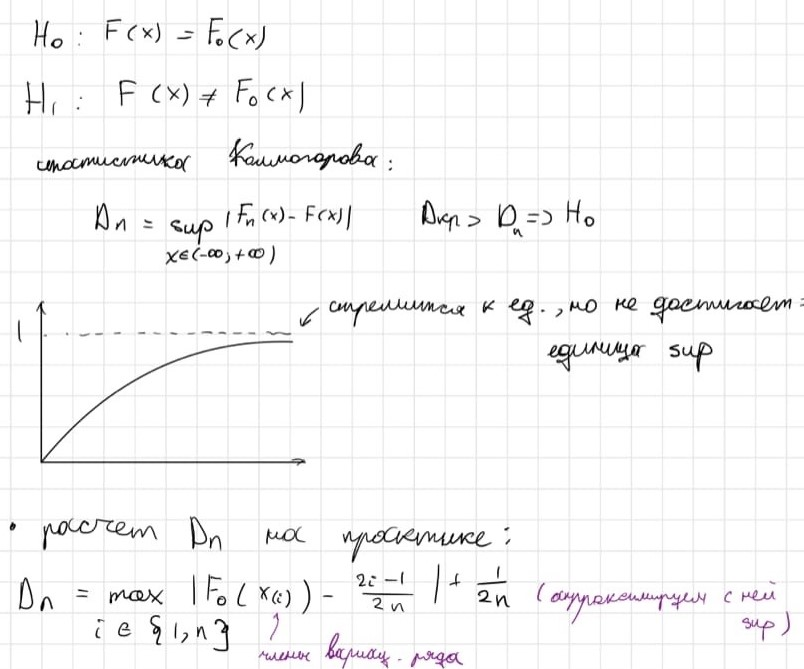

In [ ]:
stat, p_value = kstest(data.number, 'expon')


alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

#### number 

In [ ]:
data.number.describe()

- mean - выборочное среднее

- 50% - выборочная медиана

- std - выборочное несмещенное стандартное отклонение

In [ ]:
mode(data.number) #выборочная мода

In [ ]:
avg = sum(data.number) / len(data.number)
sigma_squared = sum((x-avg)**2 for x in data.number) / len(data.number)
sigma_squared #выборочная смещенная дисперсия

In [ ]:
math.sqrt(sigma_squared) #выборочное смещенное стандартное отклонение

In [ ]:
s_squared = sum((x-avg)**2 for x in data.number) / (len(data.number) - 1)
s_squared #выборочная несмещенная дисперсия

In [ ]:
st.kurtosis(data.number)

In [ ]:
st.skew(data.number) 

In [ ]:
math.sqrt(s_squared)/data.number.mean() #выборочный коэффициент вариации

In [ ]:
#гистограмма
data.number.hist()
plt.show()

In [ ]:
ax = sns.distplot(data.number,
                  bins=10,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

In [ ]:
df = px.data.tips()
fig = px.ecdf(data, x=data.number, markers=True, width=700, height=400)
fig.show()

In [ ]:
data_uniform = uniform.rvs(size=1000, loc = math.sqrt(variance(data.number)), scale=data.number.mean(), random_state=0) 
fig = px.ecdf(data_uniform, x=data_uniform, markers=True, width=700, height=400)
fig.show()

${H}_{0}$: Переменная number распределена равномерно

${H}_{1}$: Переменная number распределена иначе

$\alpha = 0.05$

Применим тест Колмогорова-Смирнова

In [ ]:
stat, p_value = kstest(data.number, 'uniform')


alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

#### male

In [ ]:
data.male.describe()

- mean - выборочное среднее

- 50% - выборочная медиана

- std - выборочное несмещенное стандартное отклонение

In [ ]:
avg = sum(data.male) / len(data.male)
sigma_squared = sum((x-avg)**2 for x in data.male) / len(data.male)
sigma_squared #выборочная смещенная дисперсия

In [ ]:
math.sqrt(sigma_squared) #выборочное смещенное стандартное отклонение

In [ ]:
s_squared = sum((x-avg)**2 for x in data.male) / (len(data.male) - 1)
s_squared #выборочная несмещенная дисперсия

In [ ]:
mode(data.male) #выборочная мода

In [ ]:
st.kurtosis(data.male)

In [ ]:
st.skew(data.male)

In [ ]:
math.sqrt(s_squared)/data.male.mean() #выборочный коэффициент вариации

In [ ]:
#гистограмма
ax= sns.distplot(data.male,
                 kde=False,
                 bins=10,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')


In [ ]:
df = px.data.tips()
fig = px.ecdf(df, x=data.male, markers=True, width=700, height=400)
fig.show()

In [ ]:
data.male.value_counts() #как мы видим из данных 17 мужчин и 9 женщин

In [ ]:
p = data.male.sum()/len(data.male) #вероятность успеха в схеме берунлии
p

In [ ]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=26, p = data.male.sum()/len(data.male), random_state = 0)
fig = px.ecdf(data_bern, x=data_bern, markers=True, width=700, height=400)
fig.show()

#### Вывод

##### выборочные характеристики:

<p></p>

<div style="border:solid black 1px; padding: 20px">

| Выборочные характеристики | Age с выбросами | Points | Number | Male | Age без выбросов |
|-----------------------------------------------|-----------------|----------|--------|-------|------------------|
| Выборочная медиана | 29 | 169.5 | 13.5 | 1 | 25 |
| Выборочное среднее | 30.23 | 191.85 | 13.5 | 0.65 | 28.76 |
| Выборочная мода | 29 | 184 | 12 | 1 | 29 |
| Выборочная несмещённая дисперсия | 80.58 | 15564.3 | 58.5 | 0.24 | 86.29 |
| Выборочная смещенная дисперсия | 77.49 | 14965.67 | 56.25 | 0.23 | 24.34 |
| Коэффициент вариации | 29.69% | 65.03% | 56.66% | 74.2% | 32.3% |
| Выборочное смещённое стандартное отклонение | 8.8 | 122.33 | 7.5 | 0.48 | 4.93 |
| Выборочное несмещённое стандартное отклонение | 8.98 | 124.76 | 7.65 | 0.49 | 5.04 |
| Выборочный коэффициент эксцесса | 8.99 | 0.44 | -1.2 | -1.58 | -0.71 |
| Выборочный коэффициент асимметрия | 2.63 | 0.95 | 0 | -0.65 | -0.12 |
| Минимум | 19 | 39 | 1 | 0 | 19 |
| Максимум | 67 | 529 | 26 | 1 | 38 |
    
    
</div>

<p></p>

##### графики:

![Google Drive Image](https://drive.google.com/uc?id=1xRHVrVjM731T3NAO9jfXiB76GADutnTN)

<p></p>

<div style="border:solid black 1px; padding: 20px">

Первые 2 графика в строке - получившиеся; вторые 2 - предпологаемого распределения.


Age с выбросами:
По получившимся графикам мы можем предположить, что переменная Age распределена с помощью треугольного распределения. 


Points:
Предпологаем, что переменная points распределена с помощью экспоненциального распределения.
Также был проведен тест Колмогорова-Смирнова на проверку экспоненциального распределения. В результате которого, было выведено, что points с некоторой долей вероятности имеет экспоненциальное распределение.


Number:
Предполагаем, что переменная Number распределена с помощью равномерного распределения.
С помощью проведенного теста Колмогорова-Смирнова по проверки на равномерное распределение - выяснилось, что Number имеет с некоторой долей вероятности равномерное распределение. 


Male:
Предполагаем, что переменная male распределена с помощью распределения Бернулли. 
Тут же берется вероятность, что мужчина - как успех (то есть 1), а вероятность , что женщина - 0. По графику отчетливо видно видно распределение значений на 0 и 1. 
Также был построен график по распределению бернулли из выборки male и он совпадает с изначальным графиком. 

Age без выбросов:
Предполагаем, что пременная распределена с помощью нормального распределения. 
Также для убеждения в этом утверждении - был проведен тест Шапиро-Уилка : для чего использовали alpha=0.05. В результате получили p.value = 0.93, что явлется больше альфа, поэтому принимаем гипотезу, что age без выбросов распределена нормально с определенной долей вероятности.  

</div>

<p></p>

###	Найдите выборочные коэффициенты корреляции между переменными пункта 2. Соответ-ствуют ли они Вашим интуитивным представлениям?

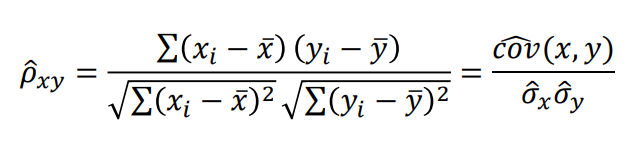

#### Построим корреляционную матрицу из коэффициентов коррляции Пирсона

In [ ]:
matrix = data[['age', 'points', 'number', 'male']].corr()
matrix.style.background_gradient(cmap='magma')

#### Построим треугольную корреляционную матрицу из коэффициентов коррляции Пирсона

In [ ]:
matrix = data[['age', 'points', 'number', 'male']].corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(5, 5))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            square=True, cmap='magma')
plt.title('Треугольная корреляционная матрица', fontsize = 10)
plt.show()

#### Построим треугольную корреляционную матрицу для очищенных данных из коэффициентов коррляции Пирсона

In [ ]:
matrix = data_new[['age', 'points', 'number', 'male']].corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(5, 5))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            square=True, cmap='magma')
plt.title('Треугольная корреляционная матрица', fontsize = 10)
plt.show()

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

- Исходя из корреляционной матрицы можно сделать вывод, что между переменными number и points существует слабая взаимосвзяь, между остальными переменными корреляция мала настолько, что зависимость прослеживается очень слабо или ее нет.
- При рассмотрении очищенной от выбросов треугольной матрицы наблюдается линейная зависимость между переменными number и age, так как корреляция Пирсона не устойчива к выбросам

    
Полученные данные соответствуют ожиданиям, поскольку можно предположить, что жюри могут уставать при прослушивании выступлений и ставить завышенные оценки или заниженные участникам, выступающим под определенными номерами, а также члены жюри могут симпотизировать выступаюшим определенного возраста, но полностью быть уверенным в этом нельзя, посольку предоставленно слишком мало данных для анализа, так как только при n>30 корреляция является показательным
    
</div>

<p></p>

### Предполагая, что переменная age имеет треугольное распределение (почитайте о нем тут https://en.wikipedia.org/wiki/Triangular_distribution), найдите оценки параметров a, b и c

In [ ]:
data.age.hist()
plt.title('гистограмма переменной age с выбросами')
plt.show()

In [ ]:
data.age.describe()

мода - 29.00

#### Оценим по методу моментов параметры треугольного распределения:

![Google Drive Image](https://drive.google.com/uc?id=1qAyZe60LqdlxdhZ2xFZbPuIhP2FH6sXp)

In [ ]:
mean = data.age.mean()
mode = mode(data.age)
var = variance(data.age)


a = 1.5 * mean - 0.5 * mode - (math.sqrt(18 * var - (9 * (mean ** 2) + 9 * (mode **2) - 18 * mean * mode)/4)/math.sqrt(3))
b = 1.5 * mean - 0.5 * mode + (math.sqrt(18 * var - (9 * (mean ** 2) + 9 * (mode **2) - 18 * mean * mode)/4)/math.sqrt(3))
c = mode

In [ ]:
#оценка методом моментов a:
a

In [ ]:
#оценка методом моментов b:
b

In [ ]:
#оценка методом моментов c:
c

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

С помощью метода моментов ыли найдены оценки параметров a,b,c:

- a = 9

- b = 53
    
- c = 29


</div>

<p></p>

### Предполагая, что переменная age распределена нормально, постройте для ее среднего значения и дисперсии доверительные интервалы надежности 90%

Так как доверительные интервалы строятся на предположении о нормальности данных вощьмем переменную age без выбросов, так как она с определенной долей вероятности распределена нормально согласно тесту Манна-Уитни

In [ ]:
p = 0.9 # Зададим надежность
df = len(data_new.age) - 1 # Зададим степени свободы

#### Построим доверительный интервал для среднего

![Google Drive Image](https://drive.google.com/uc?id=1hYp-wIPB0c8kEPvoF3yWvEe6_wh5fwv5)



In [ ]:
value = abs(t.ppf((1-p)/2, df)) # Посчитаем значение критической точки. 
# Делим на два 1-p, поскольку двустороння критическая точка
value

In [ ]:
left_border = data_new.age.mean() - math.sqrt(variance(data_new.age)) * value/math.sqrt(len(data_new.age))
right_border = data_new.age.mean() + math.sqrt(variance(data_new.age)) * value/math.sqrt(len(data_new.age))
display(Latex(r'Доверительный интервал для среднего значения переменной age без выбросов:'))
display(Math('%(left)s < a < %(right)s' % {'left': left_border, 'right': right_border}))

#### Построим доверительный интервал для дисперсии 

![Google Drive Image](https://drive.google.com/uc?id=1syuCtA4Lk5QXMtZqf5h5IbwUlCQ0B5fo)


In [ ]:
value_left = chi2.ppf(1 - (1-p)/2, df=len(data_new.age)-1) 
value_right = chi2.ppf((1-p)/2, df=len(data_new.age)-1) 

In [ ]:
left_border = (len(data_new.age) - 1) * (variance(data_new.age))/ value_left
right_border = (len(data_new.age) - 1) * (variance(data_new.age))/ value_right
display(Latex(r'Доверительный интервал для дисперсии переменной age без выбросов:'))
display(Math(r'%(left)s < {\sigma}^{2} < %(right)s' % {'left': left_border, 'right': right_border}))

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В ходе исследования было выяснено, что доверительный интервал с надежностью 90% для очищенной от выбросов переменной age равняется:
    
- Для среднего значения: 27.04 < ${a}$ < 30.48
    
- Для дисперсии: 16.71 < ${\sigma}^{2}$ < 43.94
    
    

</div>

<p></p>

### Проверьте гипотезу о том, что средний возраст участников равен выборочному медианно-му значению возраста

#### Тест Стьюдента

${H}_{0}: a = {a}_{0} = median$

${H}_{1}: a \neq {a}_{0} = median$

$\alpha = 0.05$

Поскольку мы предполагаем, что исправленная data_new.age распределена нормально, то применим T-тест

![Google Drive Image](https://drive.google.com/uc?id=1eFFbJhtTTEUdBin0-EniXhgEYAJ061QY)



In [ ]:
p = 0.05
df = len(data_new.age) - 1
t_critical= abs(t.ppf(p/2, df))
t_critical

In [ ]:
T = (data_new.age.mean() - data_new.age.median()) * math.sqrt(len(data_new.age))/ math.sqrt(variance(data_new.age))
T

In [ ]:
if abs(T) < t_critical:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В ходе исследования было выяснено, что гипотеза о том, что средний возраст участников равняется медианному принимается при уровне значимости 5%
    
    

</div>

<p></p>

###  Проверьте гипотезу о том, средний возраст мужчин превышает средний возраст женщин, используя нормальное приближение

#### Посмотрим на распределение переменных

Используем исправленные данные data_new.age, поскольку для проведения теста необходимо предположение о нормальности переменной

In [ ]:
data_new.query('male == 0')['age'].hist(bins=10, alpha=0.5, color='orange')
data_new.query('male == 1')['age'].hist(bins=10, alpha=0.5, color='green')
plt.title('Распредение возраста мужчин и женщин') # название графика
plt.xlabel('Возраст') # подпись оси x
plt.show()

In [ ]:
sns.kdeplot(x='age', data=data_new, hue='male', common_norm=False);
plt.title("Сглаженные функции плотности");

#### Воспользуемся нормальным приближением  и применим тест Стьюдента

${H}_{0}$: Средний возраст мужчин равен среднему возрасту женщин

${H}_{1}$: Средний возраст мужчин превышает средний возраст женщин

$\alpha = 0.05$

Воспользуемся тестом Стьюдента



In [ ]:
results = st.ttest_1samp(a = data_new.query('male == 1')['age'], popmean = data_new.query('male == 0')['age'].mean(), alternative='greater')

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В ходе исследования было выяснено, что гипотеза о том, что средний возраст мужчин равен среднему возрасту женщин принимается на уровне значимости 5%. Графически видно, что средний возраст у мужчин и у женщин приблизительно находится рядом, что подтверждает верность проведенного теста
    
    

</div>

<p></p>

###  Проверьте гипотезу о том, что переменная age распределена нормально

#### Критерий Шапиро-Уилка

${H}_{0}$: Переменная age распределена нормально

${H}_{1}$: Переменная age распределена иначе

$\alpha = 0.05$

Воспользуемся критерием Шапиро-Уилка:

![Google Drive Image](https://drive.google.com/uc?id=1mZo5S3HpKWGLgpT4fHJ8lQbYCWqwIPEe)


In [ ]:
results = st.shapiro(data.age) 

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В пункте 1.2.2.1 было проверено распределена ли нормально исправленная от выбросов переменная data_new.age и был сделан вывод, что исправленная переменная распределена с определенной долью вероятности распределена нормально. При исследовании данных с выбросами видно, что они искажают данные на столько, что по Критерию Шапиро-Уилка отвергается нулевая гипотеза о том, что данные распределены нормально при уровне значимости 5%
    
    

</div>

<p></p>

###	Проверьте гипотезу о том, что число набранных очков и номер, под которым выступала ко-манда в финале, являются независимыми случайными величинами

#### Критерий однородности 

${H}_{0}$: Переменные points и number являются независимыми случайными величинами

${H}_{1}$: Переменные points и number являются зависимыми случайными величинами

$\alpha = 0.05$

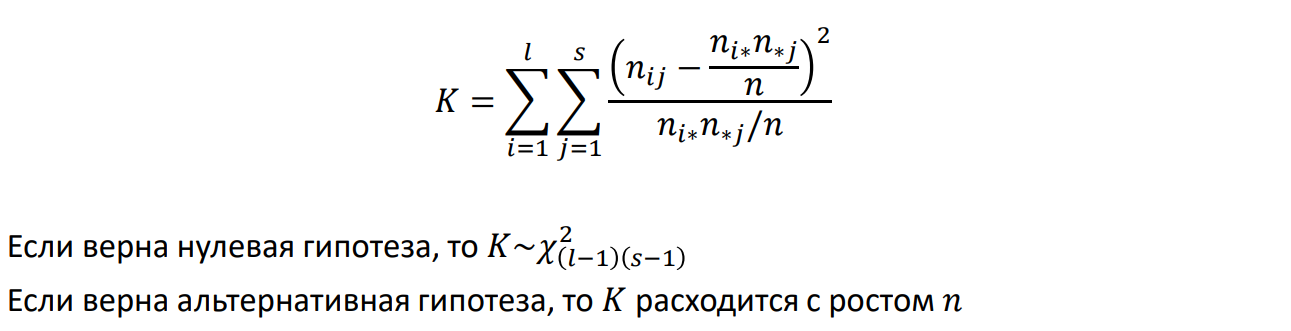


In [ ]:
contingency_table = pd.DataFrame()
contingency_table['points'] = data.points
contingency_table['number'] = data.number
contingency_table.head(5)

In [ ]:
reults = st.chi2_contingency(contingency_table)
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

Из критерия однородности мы можем сделать вывод, что переменные points и number являются зависимыми случайными величинами с надежность 5%
    

</div>

<p></p>

### Обоснования

#### Критерий Шапиро-Уилка

Критерий Шапиро-Уилка используется для проверки гипотезы $H_0$: «случайная величина X распределена нормально» и является одним из наиболее эффективных критериев проверки нормальности. Критерии, проверяющие нормальность выборки, являются частным случаем критериев согласия. Если выборка нормальна, можно далее применять мощные параметрические критерии, например, критерий Фишера.

#### Критерий согласия Колмогорова 

Критерий согласия Колмогорова – применяется для проверки гипотез о предполагаемом виде закона распределения. Ограничение – применяется только для непрерывных случаемых величин. Проверяется гипотеза $H_0: F(x)=F_{0}(x)$ против альтернативной $H_1: F(x)=F_{0}(x)$. Критерий основан на том факте, что распределение супремума разности между теоретической и эмпирической функциями распределения 
$D_n=\sup _{x \in \mathbb{R}}\left|F_n(x)-F(x)\right|$.
одинаково при любой $F(x)$. Величину $Dn$ называют статистикой Колмогорова.
При малых n для статистики Колмогорова существуют таблицы критических точек 
$Dкр$. Если $Dn$<$Dкр$, то гипотеза $H_0$ принимается, иначе отвергается. При больших n 
используют предельное распределение Колмогорова.
